In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Importing the necessary libraries

In [17]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Reading the data

Any dataset could be taken, I have tried on emails.

In [18]:
data=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin1')

Checking the first 5 rows to get infomation about data

In [19]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We only need the v2 column which contains the emails other things are not needed for our objective.

In [20]:
data=data.v2

In [36]:
data

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object

Dropping any na rows (if any).

In [22]:
data=data.dropna()

# Visual analysis on data

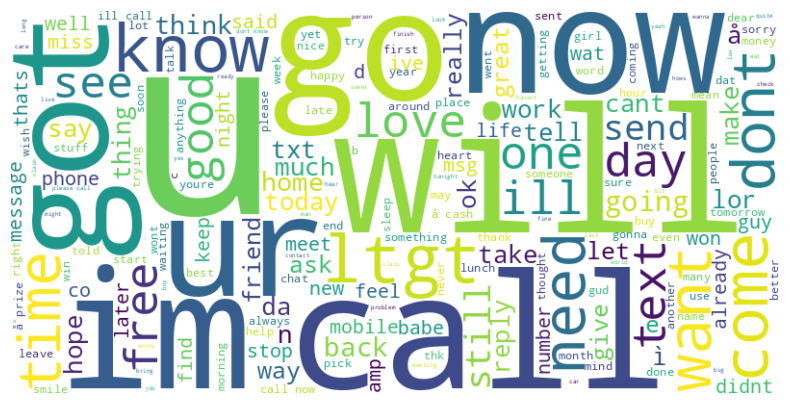

In [47]:
text=""
for sen in data:
    for word in sen:
        text+=word
# print(text)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
print("Number of records: ", data.shape[0])

Number of records:  5572


# Data cleaning

Only removing punctuations, for our purpose we cannot use stemming and other techniques.

In [24]:
import nltk
import string
tokill=string.punctuation

In [25]:
def data_cleaning(x):
    wordlist=[]
    try:
        for word in x.split():
            word=word.lower()
            letterlist=[]
            for letter in word:
                if letter not in tokill:
                    letterlist.append(letter)
            wordlist.append("".join(letterlist))
        x=" ".join(wordlist)
    except:
        print(x)
        pass
    return x  

In [26]:
data=data.apply(data_cleaning)

In [27]:
data

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: v2, Length: 5572, dtype: object

# Tokenization and padding

In [49]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
#Fitting data
tokenizer.fit_on_texts(data)
# +1 , for padding zero
total_words = len(tokenizer.word_index) + 1 

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("data: ", tokenizer.word_index['data'])

Total number of words:  9564
Word: ID
------------
<oov>:  1
data:  5346


In [29]:
input_sequences = []
for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
#     print(token_list)
    for i in range(1, len(token_list)):
        n_gram= token_list[:i+1]
        input_sequences.append(n_gram)

In [30]:
 print("Total input sequences: ", len(input_sequences))

Total input sequences:  79538


In [33]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [34]:
max_sequence_len

171

In [54]:
# create features and label
features, labels = input_sequences[:,:-1],input_sequences[:,-1]
target = tf.keras.utils.to_categorical(labels, num_classes=total_words)
labels

array([ 442, 4369,  797, ...,    2,   42,  260], dtype=int32)

In [55]:
target

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Training and model building

In [18]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(features,target, epochs=10, verbose=1,validation_split=0.2)
#print model.summary()
# print(model)

Epoch 1/10


I0000 00:00:1708467765.346715     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1989/1989 [==============================] - 95s 46ms/step - loss: 7.0813 - accuracy: 0.0347 - val_loss: 6.8022 - val_accuracy: 0.0476
Epoch 2/10
1989/1989 [==============================] - 60s 30ms/step - loss: 6.3076 - accuracy: 0.0652 - val_loss: 6.5216 - val_accuracy: 0.0768
Epoch 3/10
1989/1989 [==============================] - 59s 30ms/step - loss: 5.7441 - accuracy: 0.0992 - val_loss: 6.3682 - val_accuracy: 0.1005
Epoch 4/10
1989/1989 [==============================] - 58s 29ms/step - loss: 5.2751 - accuracy: 0.1351 - val_loss: 6.3395 - val_accuracy: 0.1194
Epoch 5/10
1989/1989 [==============================] - 58s 29ms/step - loss: 4.8675 - accuracy: 0.1718 - val_loss: 6.3202 - val_accuracy: 0.1375
Epoch 6/10
1989/1989 [==============================] - 58s 29ms/step - loss: 4.4982 - accuracy: 0.2087 - val_loss: 6.3577 - val_accuracy: 0.1550
Epoch 7/10
1989/1989 [==============================] - 58s 29ms/step - loss: 4.1604 - accuracy: 0.2474 - val_loss: 6.3929 - val_accura

# Testing

In [23]:
test = "this"
next_words = 2
  
for x in range(next_words):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list)
    predicted=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    test += " " + output_word
print(test)

1/1 [==============================] - 0s 23ms/step
this is the


# Saving model and tokenizer object for presentation.

In [24]:
model.save('model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


GUI->Streamlit application